# **[PUBG Placement Predictor](https://adel-kayyali-pubg-predictor-main-e4qvc1.streamlit.app)**

<img src="https://wallpaperaccess.com/full/407315.png" alt="Paris" style="display: block;margin-left: auto;margin-right: auto;width: 100%;">

# **Objectives & Description**

## **Features Description**
*     **groupId** - Players team ID
*     **matchId** - Match ID
*     **assists** - Number of assisted kills. The killed is actually scored for the another teammate.
*     **boosts** - Number of boost items used by a player. These are for example: energy dring, painkillers, adrenaline syringe.
*     **damageDealt** - Damage dealt to the enemy
*     **DBNOs** - Down But No Out - when you lose all your HP but you're not killed yet. All you can do is only to crawl.
*     **headshotKills** - Number of enemies killed with a headshot
*     **heals** - Number of healing items used by a player. These are for example: bandages, first-aid kits
*     **killPlace** - Ranking in a match based on kills.
*     **killPoints** - Ranking in a match based on kills points.
*     **kills** - Number of enemy players killed.
*     **killStreaks** - Max number of enemy players killed in a short amount of time.
*     **longestKill** - Longest distance between player and killed enemy.
*     **matchDuration** - Duration of a mach in seconds.
*     **matchType** - Type of match. There are three main modes: Solo, Duo or Squad. In this dataset however we have much more categories.
*     **maxPlace** - The worst place we in the match.
*     **numGroups** - Number of groups (teams) in the match.
*     **revives** - Number of times this player revived teammates.
*     **rideDistance** - Total distance traveled in vehicles measured in meters.
*     **roadKills** - Number of kills from a car, bike, boat, etc.
*     **swimDistance** - Total distance traveled by swimming (in meters).
*     **teamKills** - Number teammate kills (due to friendly fire).
*     **vehicleDestroys** - Number of vehicles destroyed.
*     **walkDistance** - Total distance traveled on foot measured (in meters).
*     **weaponsAcquired** - Number of weapons picked up.
*     **winPoints** - Ranking in a match based on won matches.

#### **Target Column**
*     **winPlacePerc** - Normalised placement (rank). The 1st place is 1 and the last one is 0.


---

## **Objectives**
1. Predict final placement from final in-game stats and initial player ratings as asked in the problem. Get yourself ANY result (make a submission).
&emsp;
 * Made a [Deployed Webapp](https://adel-kayyali-pubg-predictor-main-e4qvc1.streamlit.app), [Submission File](https://colab.research.google.com/drive/1f1BS-lt363Y_5k50PNv0Ub0qsS1kWSna#scrollTo=UQC49a4TeRAy&line=1&uniqifier=1) and [Predictive System](https://colab.research.google.com/drive/1f1BS-lt363Y_5k50PNv0Ub0qsS1kWSna#scrollTo=SIO4R9snyULo&line=1&uniqifier=1).
2. Do a simple EDA on the available data, and specify the meaningful attributes contained.
&emsp;
 * Done in so many sections, Specially in [EDA & Preprocessing](https://colab.research.google.com/drive/1f1BS-lt363Y_5k50PNv0Ub0qsS1kWSna#scrollTo=evkNbrCCW7OS) section.
3. Extract the correlation matrix and articulate what did you conclude from it about the data.
&emsp;
 * done in the [Data Visualization - Correlation Matrix](https://colab.research.google.com/drive/1f1BS-lt363Y_5k50PNv0Ub0qsS1kWSna#scrollTo=2OW1Iqds0_6U&line=3&uniqifier=1) section.
4. Extract 5 additional features you can get from available data and explain why you picked them and their correlation with the target.
&emsp;

 * Done in The [Feature Engineering](https://colab.research.google.com/drive/1f1BS-lt363Y_5k50PNv0Ub0qsS1kWSna#scrollTo=JUz9Iurxe9jC) Section.
5. Identify outliers.
&emsp;

 * Done in the [Data Visualization - Outliers](https://colab.research.google.com/drive/1f1BS-lt363Y_5k50PNv0Ub0qsS1kWSna#scrollTo=8JYSBqaDdz5G) section.
6. Identify hackers and explain your method. 
&emsp;

 * Done in the [Data Visualization - Cheaters Detecting](https://colab.research.google.com/drive/1f1BS-lt363Y_5k50PNv0Ub0qsS1kWSna#scrollTo=YrSUC4tSHXmf&line=1&uniqifier=1) section.
7. Spot Away From Keyboard (AFK) players and explain your method.
&emsp;

 * Done [Right Here](https://colab.research.google.com/drive/1f1BS-lt363Y_5k50PNv0Ub0qsS1kWSna#scrollTo=8n-GN-GIPJDD&line=1&uniqifier=1).

---

In [1]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# **Importing the Data**

In [2]:
train = pd.read_csv('train_V2.csv')
pd.set_option('display.max_columns', None)
train

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,1241,0,0,0.00,1306,squad-fpp,28,26,-1,0,0.0000,0,0.00,0,0,244.80,1.0,1466.0,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,0,0,0,0.00,1777,squad-fpp,26,25,1484,0,0.0045,0,11.04,0,0,1434.00,5.0,0.0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,0,0,0,0.00,1318,duo,50,47,1491,0,0.0000,0,0.00,0,0,161.80,2.0,0.0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,0,0,0,0.00,1436,squad-fpp,31,30,1408,0,0.0000,0,0.00,0,0,202.70,3.0,0.0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,0,1,1,58.53,1424,solo-fpp,97,95,1560,0,0.0000,0,0.00,0,0,49.75,2.0,0.0,0.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7065,c55c000abacf06,b8b5631f172c5f,c462028e64ca94,1,5,20.40,0,0,1,43,0,0,0,0.00,1273,squad-fpp,27,27,1500,0,0.0000,0,0.00,0,0,2742.00,7.0,0.0,0.9231
7066,6fc7e9cdd3499b,6bf6dc5715d149,f0fd60821fb05c,0,2,23.22,0,0,2,73,1000,0,0,0.00,1806,squad-fpp,28,27,-1,0,0.0000,0,0.00,0,0,879.00,5.0,1500.0,0.2593
7067,87b6174a7f422d,bbc8e9e8ecd36a,d244525f9ee57c,0,2,0.00,0,0,0,53,0,0,0,0.00,1967,solo-fpp,95,91,1500,0,4575.0000,0,0.00,0,0,832.10,4.0,0.0,0.5957
7068,3394a53502b210,b0b1613dda5fc7,2fe2edcb95d6ea,0,2,70.73,0,0,13,50,0,0,0,0.00,1981,duo-fpp,47,45,1512,0,1472.0000,0,0.00,0,0,2724.00,5.0,0.0,0.7174




---


# **EDA & Preprocessing**

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7070 entries, 0 to 7069
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               7070 non-null   object 
 1   groupId          7070 non-null   object 
 2   matchId          7070 non-null   object 
 3   assists          7070 non-null   int64  
 4   boosts           7070 non-null   int64  
 5   damageDealt      7070 non-null   float64
 6   DBNOs            7070 non-null   int64  
 7   headshotKills    7070 non-null   int64  
 8   heals            7070 non-null   int64  
 9   killPlace        7070 non-null   int64  
 10  killPoints       7070 non-null   int64  
 11  kills            7070 non-null   int64  
 12  killStreaks      7070 non-null   int64  
 13  longestKill      7070 non-null   float64
 14  matchDuration    7070 non-null   int64  
 15  matchType        7070 non-null   object 
 16  maxPlace         7070 non-null   int64  
 17  numGroups     

I have only 1 Categorical feature, all the others are Numerical.

In [4]:
train.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,7070.000000,7070.000000,7070.000000,7070.000000,7070.000000,7070.000000,7070.000000,7070.000000,7070.000000,7070.000000,7070.000000,7070.000000,7070.000000,7070.000000,7070.000000,7070.000000,7070.000000,7070.000000,7070.000000,7070.000000,7070.000000,7070.000000,7069.000000,7069.000000,7069.000000
mean,0.231966,1.123904,130.790468,0.652475,0.229562,1.370580,47.856719,501.587836,0.929279,0.540594,22.112587,1576.995191,44.459406,42.992645,894.477793,0.162235,621.156565,0.002829,4.454602,0.024894,0.008911,1137.417791,3.653133,603.109775,0.472648
std,0.577257,1.753821,172.702969,1.138153,0.585632,2.651735,27.504914,625.796306,1.571183,0.711827,48.983477,258.423249,23.716001,23.156854,735.828093,0.458015,1536.141315,0.055715,30.448762,0.169719,0.093983,1162.797754,2.414921,738.402982,0.307656
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,314.000000,5.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,1367.000000,28.000000,27.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,155.200000,2.000000,0.000000,0.200000
50%,0.000000,0.000000,80.600000,0.000000,0.000000,0.000000,48.000000,0.000000,0.000000,0.000000,0.000000,1438.000000,30.000000,30.000000,1445.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,683.100000,3.000000,0.000000,0.458300
75%,0.000000,2.000000,183.500000,1.000000,0.000000,2.000000,72.000000,1168.000000,1.000000,1.000000,20.207500,1849.000000,49.000000,47.000000,1500.000000,0.000000,0.016650,0.000000,0.000000,0.000000,0.000000,1931.000000,5.000000,1494.000000,0.740700
max,6.000000,11.000000,2325.000000,13.000000,8.000000,29.000000,100.000000,2026.000000,21.000000,4.000000,624.200000,2204.000000,100.000000,100.000000,2395.000000,5.000000,17210.000000,2.000000,768.400000,3.000000,1.000000,9325.000000,43.000000,1861.000000,1.000000


#### **Data Cleaning**

##### **Null and Duplicated Data**

In [5]:
train = train.drop_duplicates()

In [6]:
train.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    1
winPoints          1
winPlacePerc       1
dtype: int64

In [7]:
train.dropna(subset='winPlacePerc',inplace=True)
train.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       0
dtype: int64

I wanted to drop the only 1 Null value from my target Column. fortunately, all the Null values were in the same row so when I droped it from my DataFrame I dropped all the other Null values too.



---



#### **Feature Engineering**

##### **Total Distance & AFK**

In [8]:
train['totalDistance'] = train['rideDistance'] + train['swimDistance'] + train['walkDistance']
train['totalDistance']

0        244.8000
1       1445.0445
2        161.8000
3        202.7000
4         49.7500
          ...    
7064     173.8000
7065    2742.0000
7066     879.0000
7067    5407.1000
7068    4196.0000
Name: totalDistance, Length: 7069, dtype: float64

I have made a new feature that calculates the Total distance each player has moved.

---

Now, I want to calculate the number of players that stayed **AFK** in the whole match by Summing all the total distances and getting 0 as a resault, which means that the player moved 0 distance and That's known as **AFK** (Away-From-Keyboard).

In [9]:
print('Number of players that stayed AFK in the matches:',(train['totalDistance'] == 0).sum())
print('Number of the records that I have in the train dataset:',train.shape[0])

Number of players that stayed AFK in the matches: 144
Number of the records that I have in the train dataset: 7069


There are **12710** who stayed **AFK** in the match which are outliers, I'll need to deal with them.

In [10]:
train.drop(train[train['totalDistance'] == 0].index, inplace=True)
print('Number of AFK players in the DataSet Now:',(train['totalDistance'] == 0).sum())
print('Number of the records that I have in the train dataset Now:',train.shape[0])

Number of AFK players in the DataSet Now: 0
Number of the records that I have in the train dataset Now: 6925


---

##### **Total of picked up items** (Boosts, Heals and Weapons Stuffs)

In [11]:
train['totalItemsPicked'] = train['boosts'] + train['heals'] + train['weaponsAcquired']
train['totalItemsPicked'].describe()

count    6925.000000
mean        6.262960
std         5.344381
min         0.000000
25%         2.000000
50%         5.000000
75%         9.000000
max        45.000000
Name: totalItemsPicked, dtype: float64

Merged all the items that may be picked up into one feature

---

##### **Damage Dealt by a Team**

In [12]:
train['totalDamageByTeam'] = train.groupby('groupId').damageDealt.transform('sum')

Merged all the damage dealt by a team into 1 value

---

##### **Total Kills by a Team**

In [13]:
train['totalKillsByTeam'] =  train.groupby('groupId').kills.transform('sum')

Merged the Total kills scored by a Team.

---

##### **Total Heals and Boosts**

In [14]:
train['healsAndBoosts'] = train['heals'] + train['boosts']

Merged the heals and boosts into 1 feature

---

##### **Total Buffs used in a Team**

In [15]:
train['totalTeamBuffs'] = train.groupby('groupId').healsAndBoosts.transform('sum')

Merged the Total buffs used in a single team.

---

##### **Teamwork**

In [16]:
train['teamwork'] = train['assists'] + train['revives']

Merged the assists and revives into one feature.


---

##### **Self Healing & Boosting**

In [17]:
train['healsAndBoosts'] = train['heals'] + train['boosts']

Merged the number of heals and number of boosts into one feature.

---

Now these feature are not useful because we used them in another features that we merged earlier. If I didn't drop them, they will double effect on my model negativly. So, I'll drop them.

In [18]:
train = train.drop(axis=1,labels=['Id','matchId','groupId','rideDistance','swimDistance','walkDistance','rankPoints',
                                  'killPoints','winPoints','weaponsAcquired','boosts','heals', 'revives','assists'])

#### **Data Visualization & Adjustment**

##### **Cheaters Detecting**

###### **kills with 0 Distance Moved**

In [19]:
print(((train['kills'] > 0) & (train['totalDistance'] == 0)==True).sum())

0


I calculated the number of players who got kills while they moved 0 Total distance in the whole match, because they may be cheaters which is an Outlier. Luckly, there are 0 of those players in this dataset.



---

###### **Kills > 30**

I will detect players who got more than 30 kills in a single match and who got more than 10 roadkills, they will be either cheaters or outliers.

In [20]:
train['cheater'] = ((train['kills'] > 30) | (train['roadKills'] > 10)).astype(int)
train['cheater'].value_counts()

0    6925
Name: cheater, dtype: int64

In [21]:
train.drop(train[train['cheater']==1].index, inplace=True)
train['cheater'].value_counts()

0    6925
Name: cheater, dtype: int64

I got 9 records may be cheaters, or just an outliers. in both ways I'll need to drop them.

---

###### **Very Long Distance Kill**

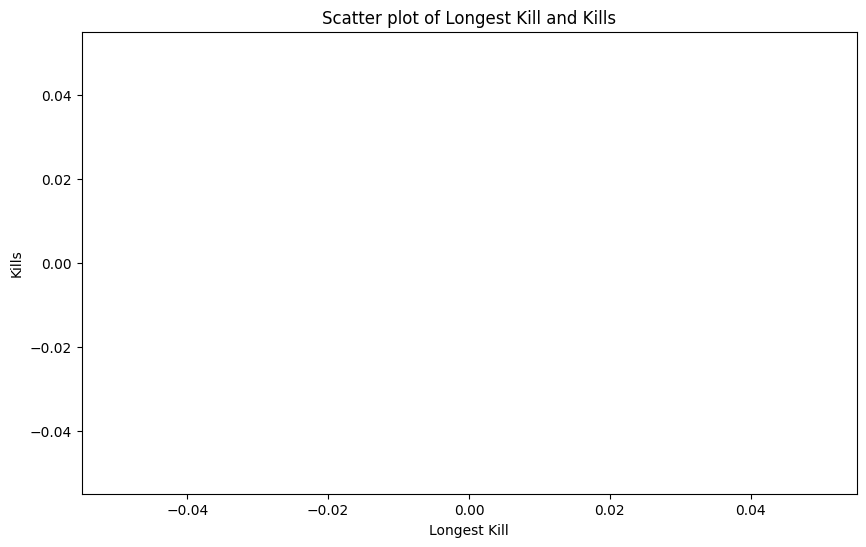

In [22]:
dist = train[train['longestKill']>=1000]
plt.figure(figsize=(10, 6))
plt.scatter(dist['longestKill'], dist['kills'])
plt.xlabel('Longest Kill')
plt.ylabel('Kills')
plt.title('Scatter plot of Longest Kill and Kills')
plt.show()

I got many players that got so many kills from a range that's more than 1000 Meters, it's a bit unrealistic and might be cheating! but from another side with a 8x scope, a static target, very good position and a lot of luck it is possible. 

So it is either a cheater or an outlier, bothways I'll be dropping them from my DataFrame.
![Imgur](https://zilliongamer.com/uploads/pubg-m/guide/sniper/map-range.jpg)

In [23]:
train.drop(train[train['longestKill'] > 1000].index, inplace=True)
train[train['longestKill'] > 1000].sum().sum()

0.0

In [24]:
train = train.drop(axis=1,labels=['cheater'])

---

In [25]:
train.columns

Index(['damageDealt', 'DBNOs', 'headshotKills', 'killPlace', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'roadKills', 'teamKills', 'vehicleDestroys',
       'winPlacePerc', 'totalDistance', 'totalItemsPicked',
       'totalDamageByTeam', 'totalKillsByTeam', 'healsAndBoosts',
       'totalTeamBuffs', 'teamwork'],
      dtype='object')

In [26]:
new_order = ['damageDealt', 'DBNOs', 'headshotKills', 'killStreaks',
       'longestKill', 'matchType',
       'numGroups', 'totalDistance',
       'totalItemsPicked', 'totalDamageByTeam', 'totalKillsByTeam',
       'healsAndBoosts', 'totalTeamBuffs', 'teamwork', 'winPlacePerc']
train = train.reindex(columns=new_order)

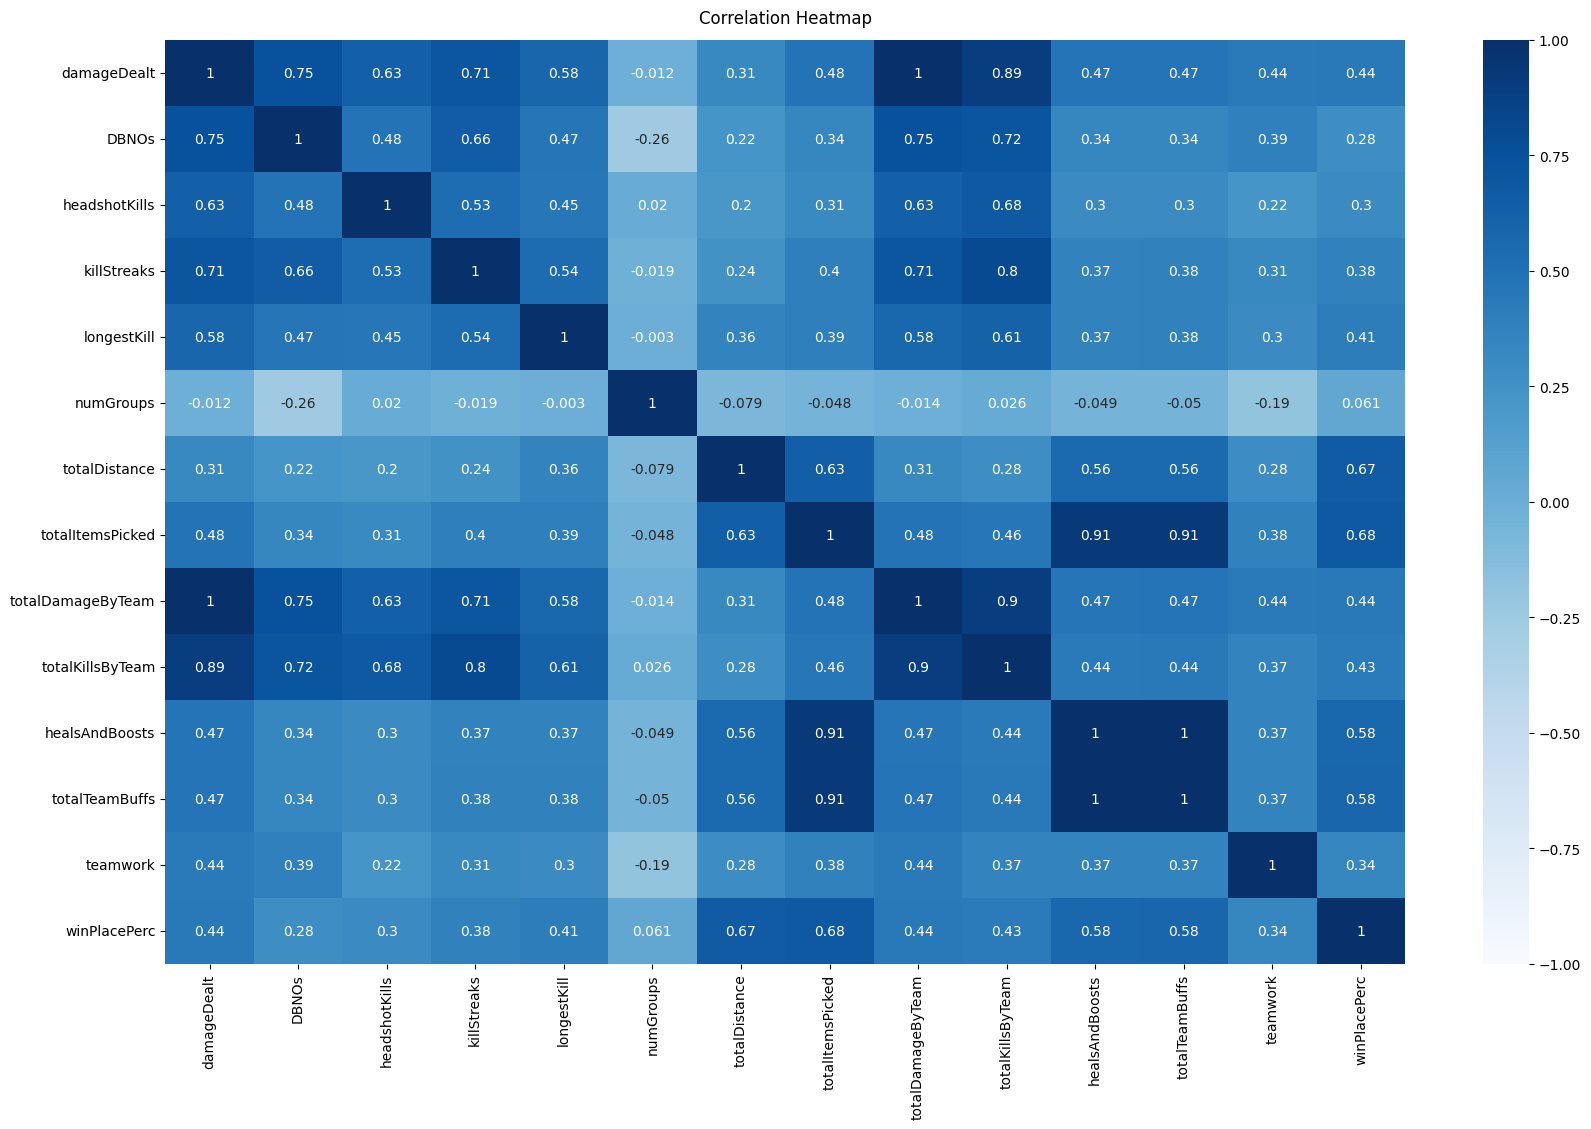

In [27]:
plt.figure(figsize=(20, 12))
heatmap = sns.heatmap(train.corr(), vmin=-1, vmax=1, annot=True, cmap="Blues")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

We can notice that:

1. `totalKillsByTeam` and `totalDamageByTeam` 
2. `healsAndBoosts` and `totalTeamBuffs`
3. `totalItemsPicked` and `healsAndBoosts`

**All of them are strongly positive correlated.**

---

##### **Transforming (numGroups) Feature**

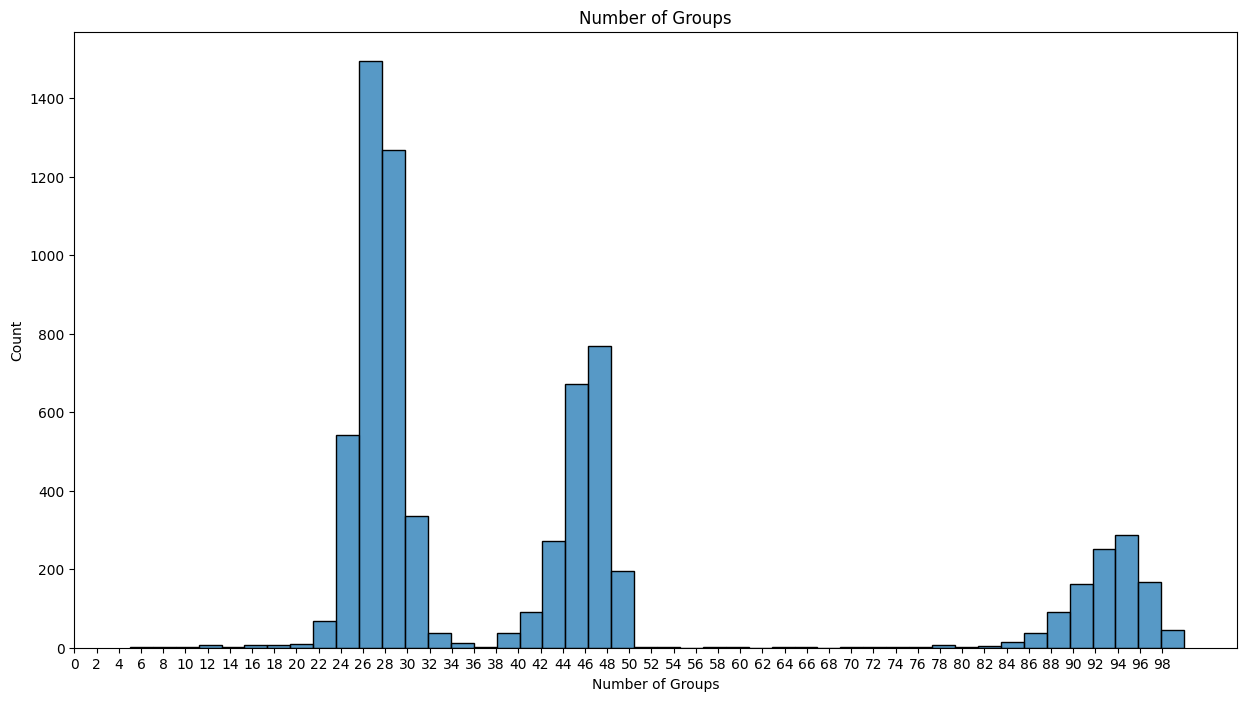

In [28]:
plt.figure(figsize=(15,8))
fig = sns.histplot(data=train, x="numGroups")
fig.set_title("Number of Groups")
plt.xlabel("Number of Groups")
plt.xticks(range(0, 100, 2))
plt.show()

In [29]:
bins = [-1, 35, 66, 100]
labels = ['0-35', '36-66', '67-100']
train['numGroups_bins'] = pd.cut(train['numGroups'], bins=bins, labels=labels)
print(train['numGroups_bins'].value_counts())

0-35      3805
36-66     2044
67-100    1076
Name: numGroups_bins, dtype: int64


As it's shown in the previous plot, The `numGroups` has 3 main Peeks: `0-35`, `36-66` and `67-100`. So I decided to slice this attribute into 3 main groups because I believe it will affect the Model Positivly (*when there are less Groups in the match, it will be a higher chance to win!*)

As a resault, I have 2 Categorical Values now.

---

##### **MatchType feature Reduction and Modifying**

<Axes: >

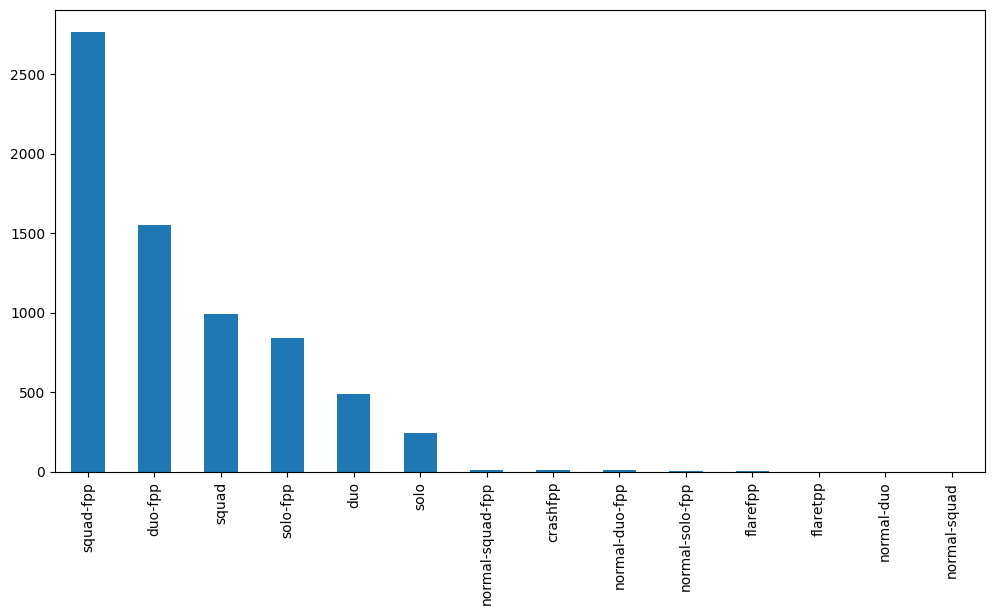

In [30]:
plt.figure(figsize=(12,6))
train['matchType'].value_counts().plot(kind='bar')

In [31]:
indices = train[train['matchType'] == 'crashfpp'].index
train = train.drop(index=indices)


indices = train[train['matchType'] == 'crashtpp'].index
train = train.drop(index=indices)


indices = train[train['matchType'] == 'flaretpp'].index
train = train.drop(index=indices)


indices = train[train['matchType'] == 'flarefpp'].index
train = train.drop(index=indices)

I dropped all the `crash` & `flare` values because their volume is not high and they will not make the Model better.

<Axes: >

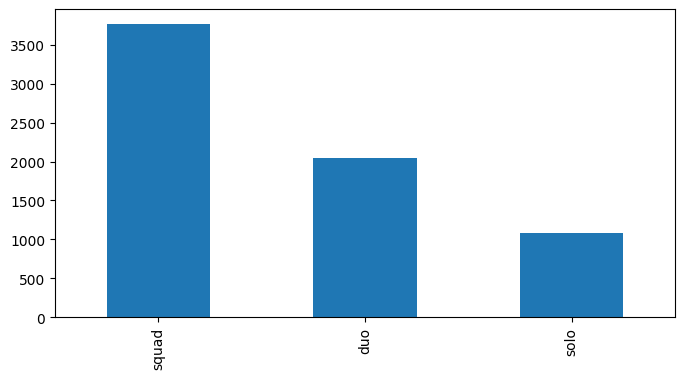

In [32]:
squad_mapping = {'squad-fpp': 'squad', 'normal-squad-fpp': 'squad', 'normal-squad': 'squad'}
train['matchType'] = train['matchType'].replace(squad_mapping)


solo_mapping = {'solo-fpp': 'solo', 'normal-solo-fpp': 'solo', 'normal-solo': 'solo'}
train['matchType'] = train['matchType'].replace(solo_mapping)


duo_mapping = {'duo-fpp': 'duo', 'normal-duo-fpp': 'duo', 'normal-duo': 'duo'}
train['matchType'] = train['matchType'].replace(duo_mapping)


plt.figure(figsize=(8,4))
train['matchType'].value_counts().plot(kind='bar')

In [33]:
train.drop('numGroups', axis=1, inplace=True)

I merged all the types to those 3 main types, it will allow me to deal with my model easier and give me a much clearer view to the data.



---



##### **Dealing with outliers**

In [34]:
train.columns.shape

(15,)

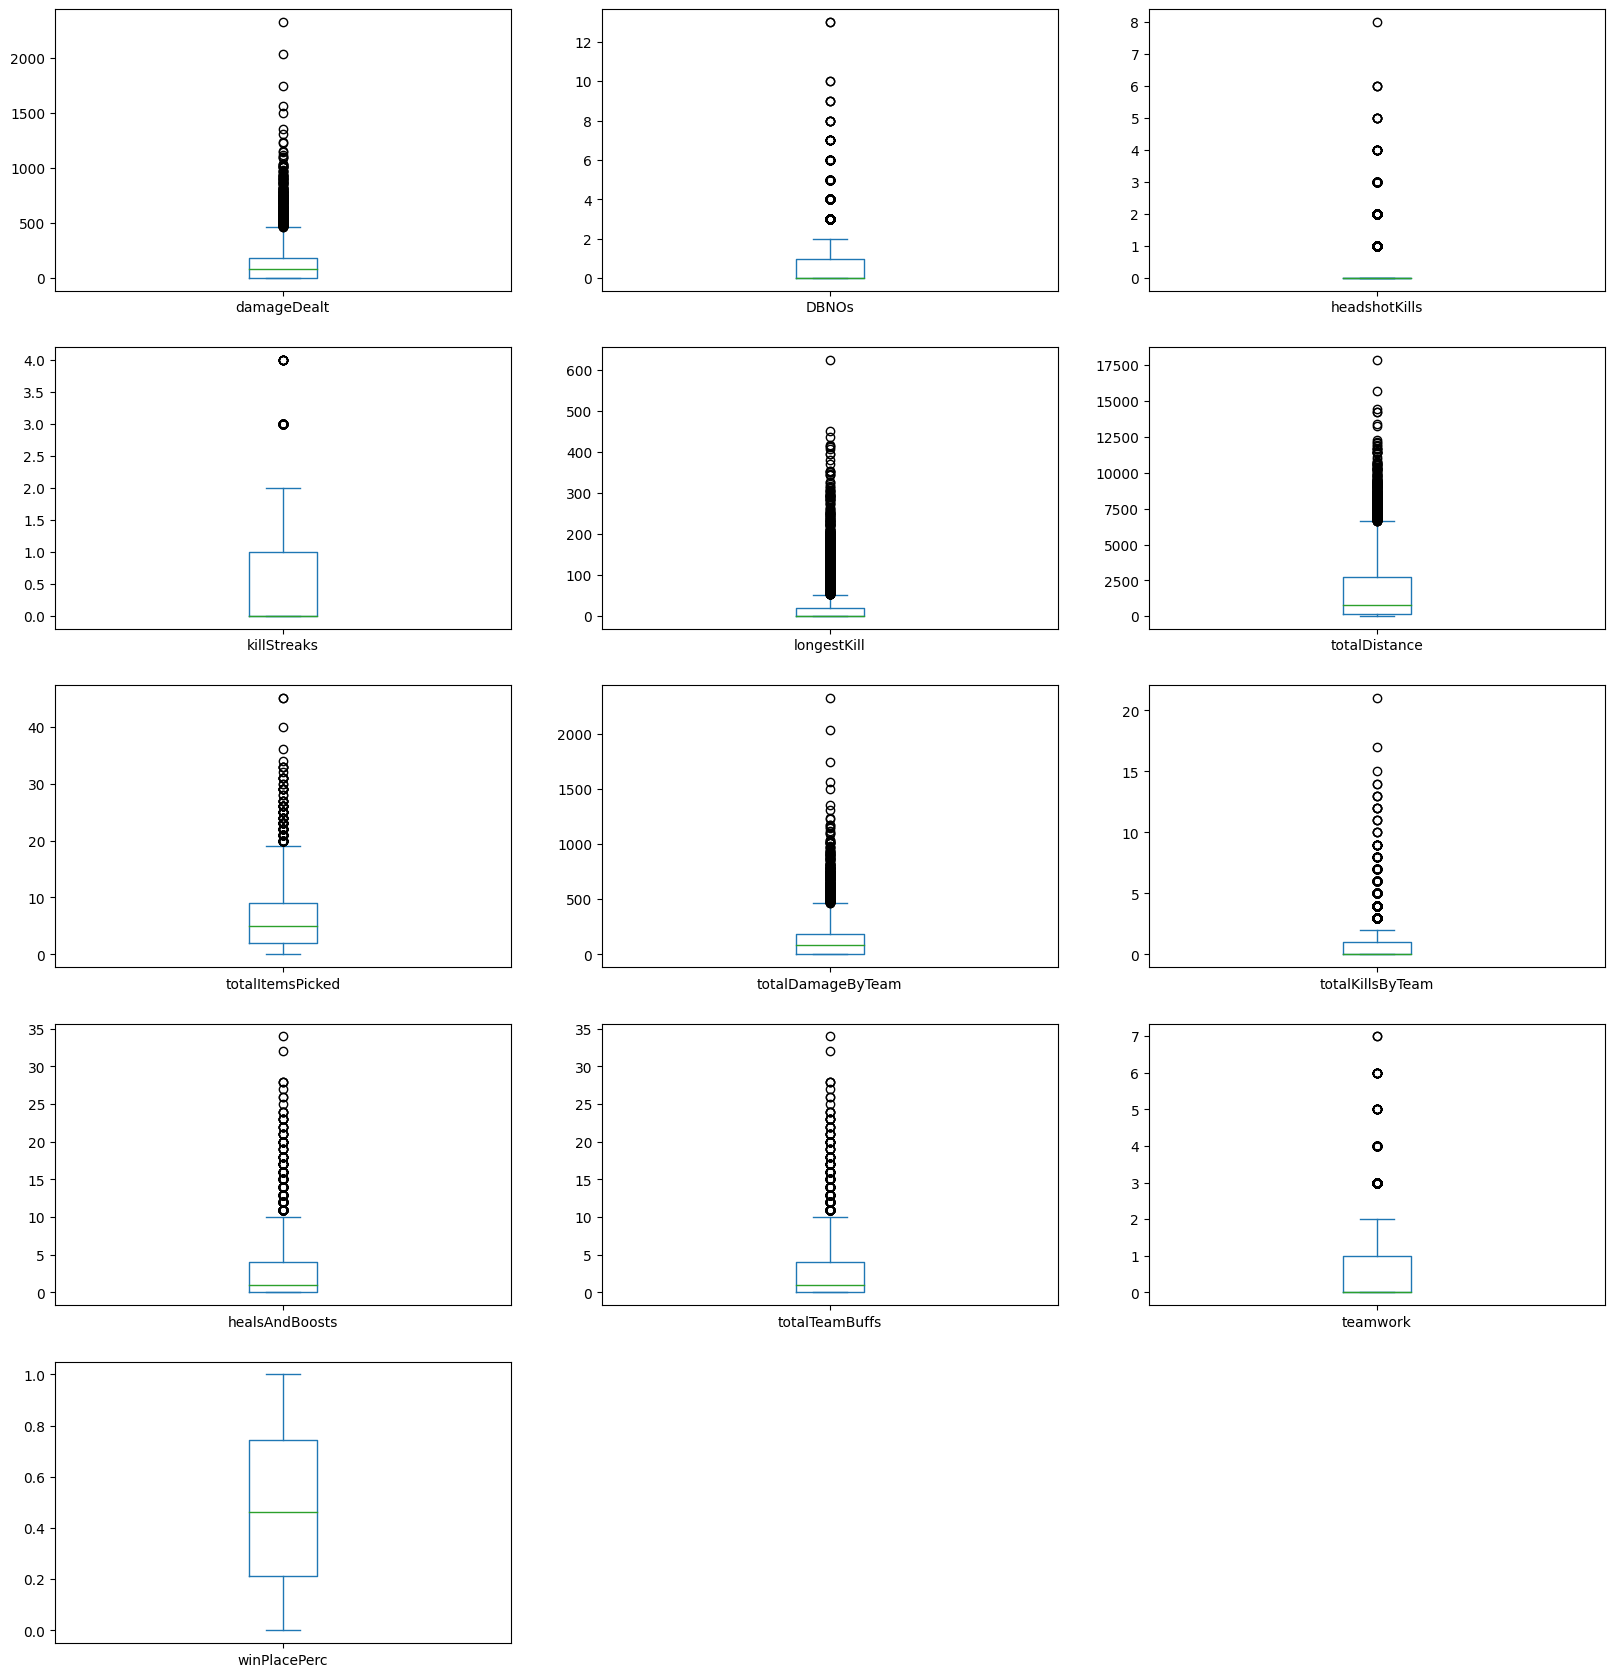

In [35]:
fig = plt.figure(figsize=(20, 30))

i = 1
for col in train[['damageDealt', 'DBNOs', 'headshotKills',
       'killStreaks', 'longestKill',
       'totalDistance', 'totalItemsPicked',
       'totalDamageByTeam', 'totalKillsByTeam', 'healsAndBoosts',
       'totalTeamBuffs', 'teamwork', 'winPlacePerc']]:
  if i < 14:
    fig.add_subplot(7,3,i)
    i += 1
    train[col].plot(kind='box')
  else:
    break

<Axes: ylabel='killStreaks'>

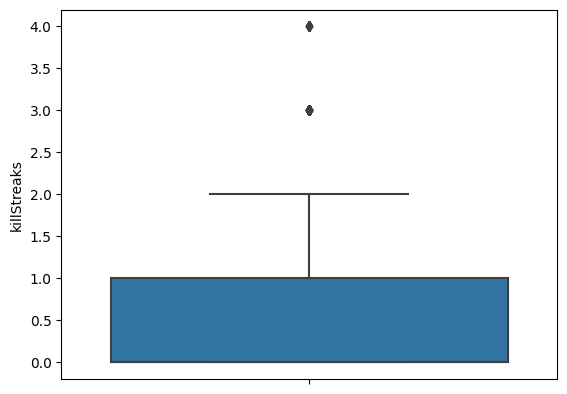

In [36]:
median_killstreaks = train['killStreaks'].median()
train.loc[train['killStreaks'] > 12, 'killStreaks'] = median_killstreaks

sns.boxplot(y=train['killStreaks'])

<Axes: ylabel='DBNOs'>

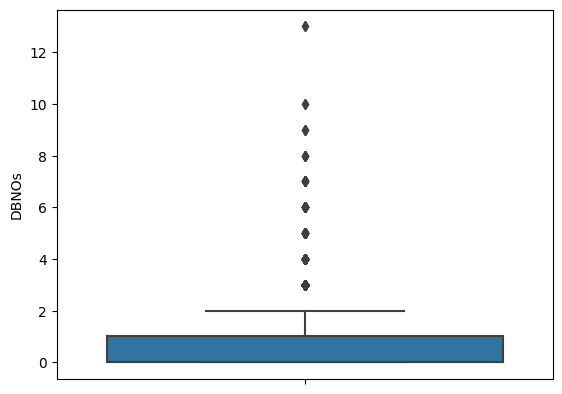

In [37]:
median_DBNOs = train['DBNOs'].median()
train.loc[train['DBNOs'] > 29, 'DBNOs'] = median_DBNOs

sns.boxplot(y=train['DBNOs'])

<Axes: ylabel='totalDistance'>

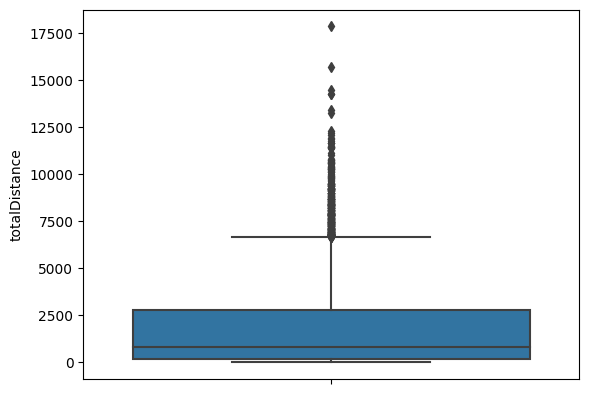

In [38]:
median_totalDistance = train['totalDistance'].median()
train.loc[train['totalDistance'] > 25000, 'totalDistance'] = median_totalDistance

sns.boxplot(y=train['totalDistance'])

- - -

<Axes: ylabel='totalItemsPicked'>

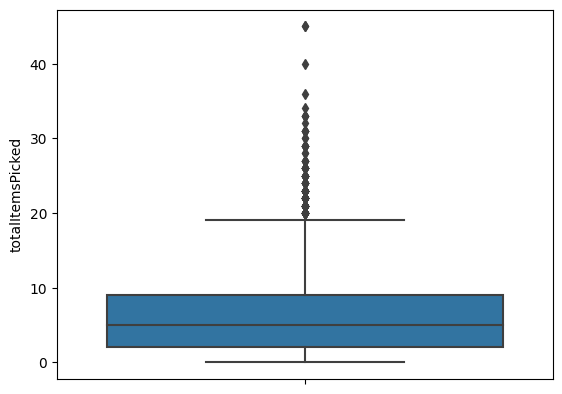

In [39]:
median_totalItemsPicked = train['totalItemsPicked'].median()
train.loc[train['totalItemsPicked'] > 100, 'totalItemsPicked'] = median_totalItemsPicked

sns.boxplot(y=train['totalItemsPicked'])

<Axes: ylabel='totalDamageByTeam'>

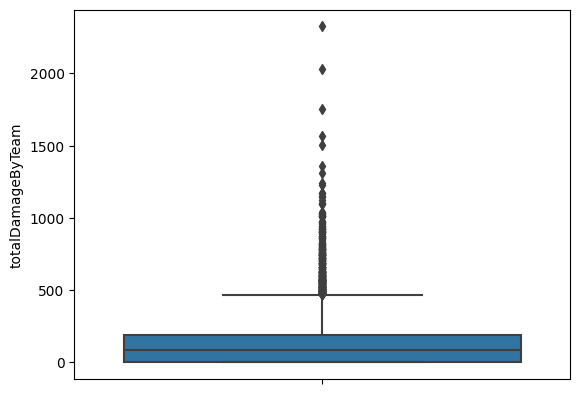

In [40]:
median_totalDamageByTeam = train['totalDamageByTeam'].median()
train.loc[train['totalDamageByTeam'] > 3900, 'totalDamageByTeam'] = median_totalDamageByTeam

sns.boxplot(y=train['totalDamageByTeam'])

<Axes: ylabel='totalKillsByTeam'>

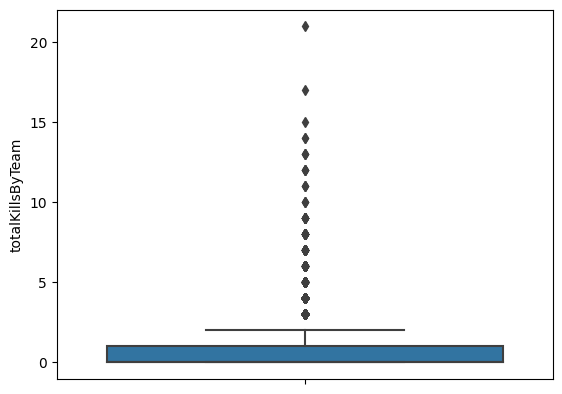

In [41]:
median_totalKillsByTeam = train['totalKillsByTeam'].median()
train.loc[train['totalKillsByTeam'] > 33, 'totalKillsByTeam'] = median_totalKillsByTeam

sns.boxplot(y=train['totalKillsByTeam'])

Dealt with the Most obvious outliers.

---

##### **Distribution of Kills to Win Place**

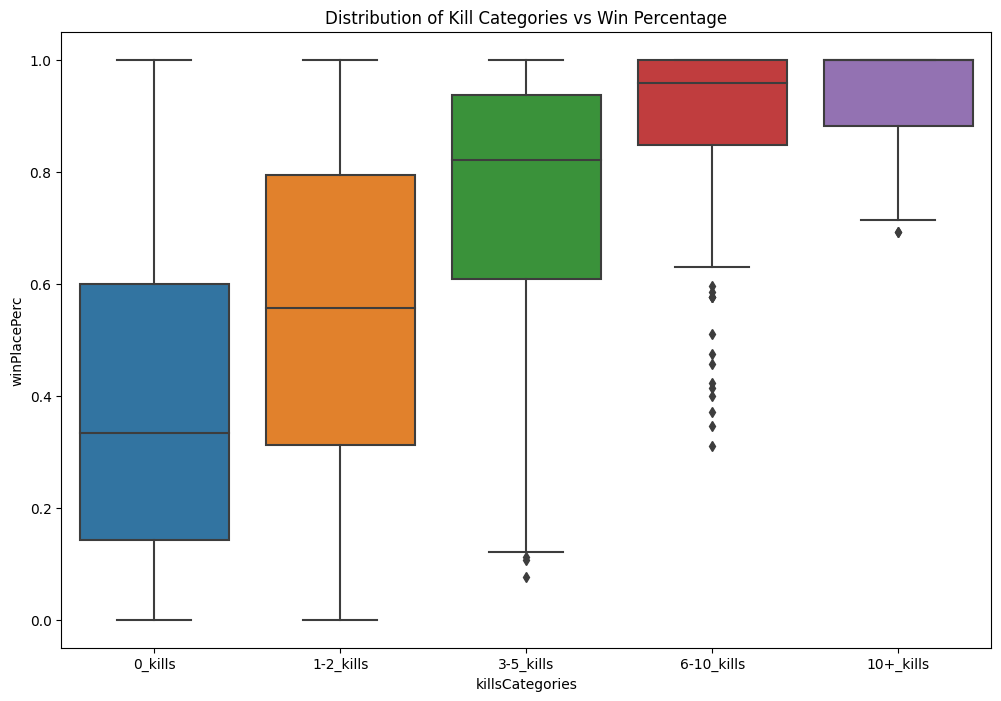

In [42]:
kills =train.copy()

kills['killsCategories'] = pd.cut(kills['totalKillsByTeam'], [-1, 0, 2, 5, 10, 60], labels=['0_kills','1-2_kills', '3-5_kills', '6-10_kills', '10+_kills'])

kills.columns

plt.figure(figsize=(12,8))
plt.title("Distribution of Kill Categories vs Win Percentage")
sns.boxplot(x="killsCategories", y="winPlacePerc", data=kills)
plt.show()


---

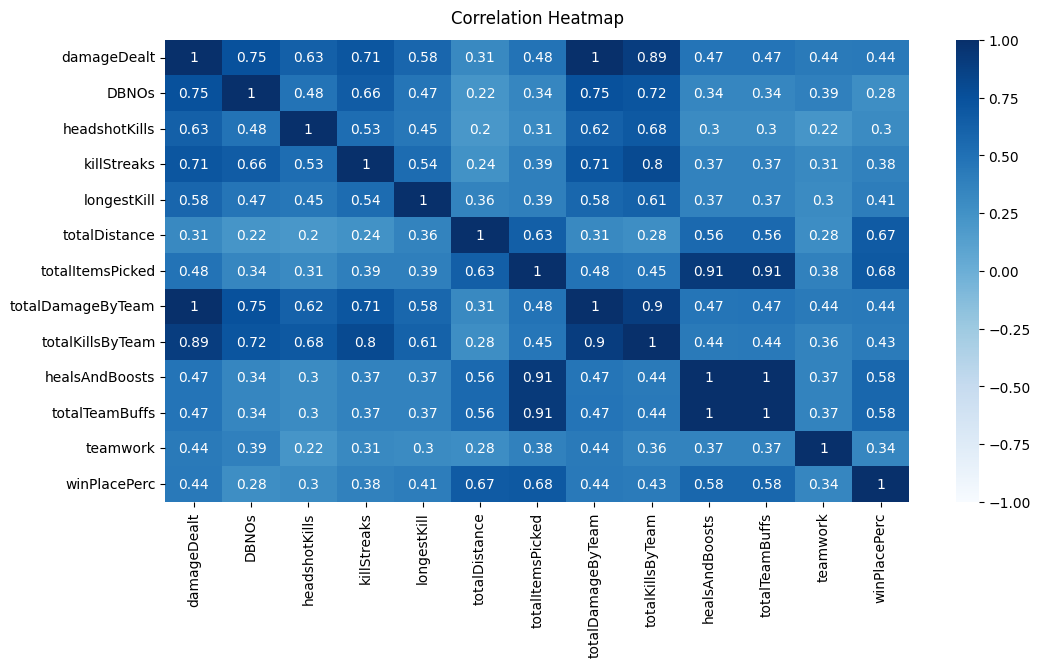

In [43]:
plt.figure(figsize=(12, 6))
heatmap = sns.heatmap(train.corr().abs(), vmin=-1, vmax=1, annot=True, cmap='Blues')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

This is the Coorelation Heatmap for now.

In [44]:
train.drop(['damageDealt','totalKillsByTeam','healsAndBoosts'], axis=1, inplace=True)

Dropped these features because they are considered as Multicollinearity and can cause several issues for the model's Accuracy.

---

#### **Encoding**

In [45]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6912 entries, 0 to 7068
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   DBNOs              6912 non-null   int64   
 1   headshotKills      6912 non-null   int64   
 2   killStreaks        6912 non-null   int64   
 3   longestKill        6912 non-null   float64 
 4   matchType          6912 non-null   object  
 5   totalDistance      6912 non-null   float64 
 6   totalItemsPicked   6912 non-null   float64 
 7   totalDamageByTeam  6912 non-null   float64 
 8   totalTeamBuffs     6912 non-null   int64   
 9   teamwork           6912 non-null   int64   
 10  winPlacePerc       6912 non-null   float64 
 11  numGroups_bins     6912 non-null   category
dtypes: category(1), float64(5), int64(5), object(1)
memory usage: 654.9+ KB


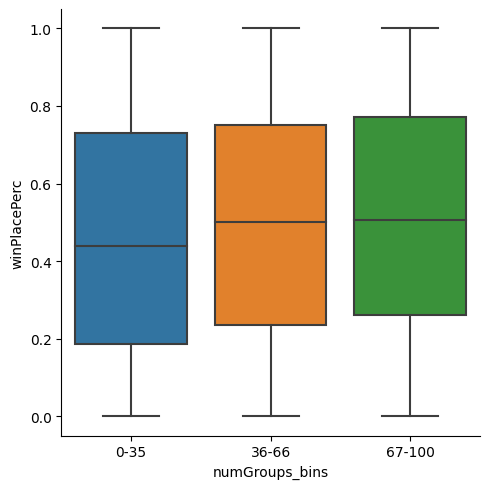

In [46]:
sns.catplot(data=train, x='numGroups_bins', y='winPlacePerc', kind='box');

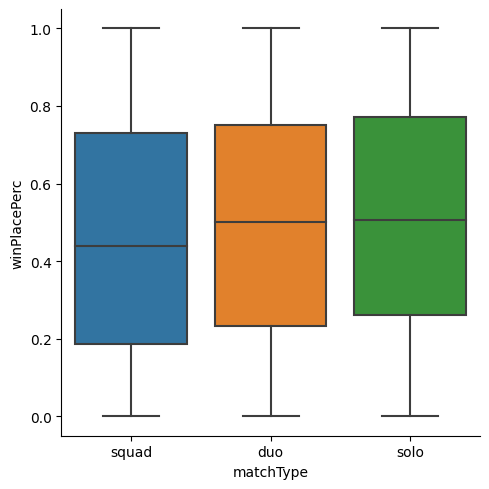

In [47]:
sns.catplot(data=train, x='matchType', y='winPlacePerc', kind='box');

There is no such an order or ranking, so once I'll encode these 2 features using `OneHotEncoding`.

---

##### **Getting Dummies**

In [48]:
train = pd.get_dummies(train, columns=['matchType','numGroups_bins'], drop_first=True)

---

In [49]:
train.shape

(6912, 14)

In [50]:
train.head()

,DBNOs,headshotKills,killStreaks,longestKill,totalDistance,totalItemsPicked,totalDamageByTeam,totalTeamBuffs,teamwork,winPlacePerc,matchType_solo,matchType_squad,numGroups_bins_36-66,numGroups_bins_67-100
0,0,0,0,0.00,244.8000,1.0,0.00,0,0,0.4444,0,1,0,0
1,0,0,0,0.00,1445.0445,5.0,91.47,0,0,0.6400,0,1,0,0
2,0,0,0,0.00,161.8000,2.0,68.00,0,1,0.7755,0,0,1,0
3,0,0,0,0.00,202.7000,3.0,32.90,0,0,0.1667,0,1,0,0
4,0,0,1,58.53,49.7500,2.0,100.00,0,0,0.1875,1,0,0,1


---

####**Normalization**

In [51]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

y = train['winPlacePerc']
Train = train.drop('winPlacePerc', axis=1)

X_std = scaler.fit_transform(Train)

X_std = pd.DataFrame(X_std, columns=Train.columns)
X = X_std
X

,DBNOs,headshotKills,killStreaks,longestKill,totalDistance,totalItemsPicked,totalDamageByTeam,totalTeamBuffs,teamwork,matchType_solo,matchType_squad,numGroups_bins_36-66,numGroups_bins_67-100
0,-0.58158,-0.396731,-0.772201,-0.457058,-0.704381,-0.985289,-0.768649,-0.651018,-0.491546,-0.431983,0.911854,-0.646185,-0.429387
1,-0.58158,-0.396731,-0.772201,-0.457058,-0.160021,-0.236779,-0.243115,-0.651018,-0.491546,-0.431983,0.911854,-0.646185,-0.429387
2,-0.58158,-0.396731,-0.772201,-0.457058,-0.742025,-0.798162,-0.377960,-0.651018,0.729722,-0.431983,-1.096666,1.547544,-0.429387
3,-0.58158,-0.396731,-0.772201,-0.457058,-0.723475,-0.611034,-0.579624,-0.651018,-0.491546,-0.431983,0.911854,-0.646185,-0.429387
4,-0.58158,-0.396731,0.627971,0.728536,-0.792844,-0.798162,-0.194106,-0.651018,-0.491546,2.314905,-1.096666,-0.646185,2.328904
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6907,-0.58158,-0.396731,-0.772201,-0.457058,-0.736583,-0.985289,-0.477298,-0.651018,-0.491546,-0.431983,-1.096666,1.547544,-0.429387
6908,-0.58158,-0.396731,-0.772201,-0.457058,0.428201,1.260241,-0.651442,0.881363,0.729722,-0.431983,0.911854,-0.646185,-0.429387
6909,-0.58158,-0.396731,-0.772201,-0.457058,-0.416746,0.511731,-0.635240,0.370570,-0.491546,-0.431983,0.911854,-0.646185,-0.429387
6910,-0.58158,-0.396731,-0.772201,-0.457058,1.636932,-0.049652,-0.768649,-0.140224,-0.491546,2.314905,-1.096666,-0.646185,2.328904


---

# **Modeling**

In [52]:
print(X.shape)
print(y.shape)

(6912, 13)
(6912,)


#### **Split the data into `Training` and `Testing`**

In [53]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape #Printing the shape to make sure there is nothing wrong

((5529, 13), (1383, 13), (5529,), (1383,))

*Perfect!*

---

#### **Linear Regression**

In [54]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [55]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)

Mean Absolute Error (MAE): 0.15309435112693384
Mean Squared Error (MSE): 0.036116199529648
Root Mean Squared Error (RMSE): 0.19004262555976226
R-squared (R2) Score: 0.6136163511546069


Evaluation of `Linear Regression` is not bad, but I'll try another algorithms.

---

#### **RandomForestRegressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=500, max_depth=9, random_state=42)
rf_reg.fit(X_train, y_train)

RandomForestRegressor(max_depth=9, n_estimators=500, random_state=42)

In [ ]:
# Make predictions on the testing data
y_pred = rf_reg.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)

Mean Absolute Error (MAE): 0.1106292953825225
Mean Squared Error (MSE): 0.02133146560156563
Root Mean Squared Error (RMSE): 0.14605295478546687
R-squared (R2) Score: 0.7674598998055916


##### **Hyperparameter Tuning - Grid Search**

In [ ]:
from sklearn.model_selection import GridSearchCV


# # define the parameter grid for GridSearchCV
# param_grid = {'n_estimators': [50, 100, 150],
#               'max_depth': [None, 5, 10, 15]}

# # create a RandomForestRegressor instance
# rf_reg = RandomForestRegressor()

# # perform cross-validation using GridSearchCV
# grid_search = GridSearchCV(rf_reg, param_grid=param_grid, cv=5)
# grid_search.fit(X_train, y_train)

# # get the best parameters and the best score from GridSearchCV
# best_params = grid_search.best_params_
# best_score = grid_search.best_score_

# # use the best parameters to fit the model and make predictions on the test set
# best_rf_reg = RandomForestRegressor(**best_params)
# best_rf_reg.fit(X_train, y_train)
# y_pred = best_rf_reg.predict(X_test)

# # calculate the mean squared error
# mse = mean_squared_error(y_test, y_pred)
# print("Mean Squared Error:", mse)

I got a better evaluation on the `RandomForestRegressor` Model than the `LinearRegression` model. Still, I will try another algorithm, the `XGBoost`.

---

#### **XGBoost Model**

In [56]:
import xgboost as xgb

In [57]:
# Train the XGBoost model
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=143, max_depth=5, learning_rate=0.04, alpha=0.5, lambda_reg=0.1, random_state=42)
xgb_reg.fit(X_train, y_train)

[00:41:40] WARNING: ../src/learner.cc:767: 
Parameters: { "lambda_reg" } are not used.



XGBRegressor(alpha=0.5, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, lambda_reg=0.1, learning_rate=0.04,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=143, n_jobs=None, num_parallel_tree=None, ...)

##### **Hyperparameter Tuning - Randomized Search & Grid Search**

In [58]:
from sklearn.model_selection import GridSearchCV #For the values of alpha and lambda_reg (Lasso & Ridge)

# # Define the grid of hyperparameters to search
# param_grid = {'alpha': [0, 0.1, 0.5, 1], 'reg_lambda': [0, 0.1, 0.5, 1]}

# # Use GridSearchCV to search for the best values of alpha and lambda
# grid_search = GridSearchCV(estimator=xgb_reg, param_grid=param_grid, cv=5, n_jobs=-1)
# grid_search.fit(X_train, y_train)

# # Print the best values of alpha and lambda found by GridSearchCV
# print("Best alpha:", grid_search.best_params_['alpha'])
# print("Best lambda:", grid_search.best_params_['reg_lambda'])

# # Use the best values of alpha and lambda to create an XGBoost Regression model
# best_xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=143, max_depth=5, learning_rate=0.04, alpha=grid_search.best_params_['alpha'], reg_lambda=grid_search.best_params_['reg_lambda'], random_state=42)

# # Fit the XGBoost Regression model to the training data
# best_xgb_reg.fit(X_train, y_train)

# # Make predictions on the testing data
# y_pred = best_xgb_reg.predict(X_test)

# # Evaluate the performance of the model using mean squared error
# mse = mean_squared_error(y_test, y_pred)
# print("Mean Squared Error:", mse)

In [59]:
from sklearn.model_selection import RandomizedSearchCV #for n_estimators, max_depth, and other parameters ...

# # define the parameter distribution for RandomizedSearchCV
# param_dist = {'n_estimators': [100, 200, 300],
#               'max_depth': [3, 5, 7],
#               'learning_rate': [0.05, 0.1, 0.15],
#               'subsample': [0.6, 0.8, 1],
#               'colsample_bytree': [0.6, 0.8, 1],
#               'gamma': [0, 1, 5]}

# # create an XGBRegressor instance
# xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# # perform randomized search using RandomizedSearchCV
# random_search = RandomizedSearchCV(estimator=xgb_reg, param_distributions=param_dist, n_iter=100, cv=5, random_state=42)
# random_search.fit(X_train, y_train)

# # print the best hyperparameters
# print("Best hyperparameters:", random_search.best_params_)

# # make predictions on the testing data using the best model
# y_pred = random_search.predict(X_test)

# # evaluate the performance of the model using mean squared error
# mse = mean_squared_error(y_test, y_pred)
# print("Mean Squared Error:", mse)


In [60]:
# Make predictions on the testing data
y_pred = xgb_reg.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)

Mean Absolute Error (MAE): 0.11282376883188537
Mean Squared Error (MSE): 0.022819250382107692
Root Mean Squared Error (RMSE): 0.15106041964097575
R-squared (R2) Score: 0.7558717323145397


I got a better Evaluation using `XGBoost Regressor`! So I'll Choose the `xgb_reg` Model.

---

##**Pickle**

I'll save the model, Columns and Scaler to use them for the Deployment.

### **Saving The `xgb_reg` Model**

In [61]:
filename = 'PUBG_model.sav'
pickle.dump(xgb_reg, open(filename, 'wb'))

### **saving the Columns**

In [62]:
X_train.columns

Index(['DBNOs', 'headshotKills', 'killStreaks', 'longestKill', 'totalDistance',
       'totalItemsPicked', 'totalDamageByTeam', 'totalTeamBuffs', 'teamwork',
       'matchType_solo', 'matchType_squad', 'numGroups_bins_36-66',
       'numGroups_bins_67-100'],
      dtype='object')

In [63]:
columns = ['DBNOs', 'headshotKills', 'killStreaks', 'longestKill', 'totalDistance','totalItemsPicked', 'totalDamageByTeam', 'totalTeamBuffs', 'teamwork','matchType_solo', 'matchType_squad', 'numGroups_bins_36-66','numGroups_bins_67-100']

In [64]:
with open('columns.sav', 'wb') as f:
    pickle.dump(columns, f)

### **Saving the Scaler**

In [65]:
with open('scaler.sav', 'wb') as f:
    pickle.dump(scaler, f)

# **Building a Predictive System**

In [66]:
def get_placement_prediction(input_data):
    # change the input data to numpy array and reshape
    input_data_as_np_array = np.asarray(input_data).reshape(1,-1)

    # normalize the input data using the scaler
    input_data_normalized = scaler.transform(input_data_as_np_array)

    prediction = xgb_reg.predict(input_data_normalized)[0]
    if prediction > 0.4:
        return '1st-5th' 
    elif prediction > 0.3:
        return '6th-10th'
    elif prediction > 0.2:
        return '11th-20th' 
    elif prediction > 0.1:
        return '21st-30th' 
    else:
        return '31th-100th'

# '''
# Note: The Model that I'v made is kinda tough, it doesn't give a High
#       Placement (1st-5th) because it almost never predicts a value that is > 0.45 ,
#       So I decided to set the threshold of these very High placements as 0.4
#       because I found that it is the best value to suit it, and then I made the other 
#       thresholds for the other placements predictions descendingly
# '''

In [67]:
input_data = [3, 1, 2, 100, 10, 20, 200, 2, 0.8, 1, 0, 0, 1]
placement_prediction = get_placement_prediction(input_data)
print(f"The predicted placement is {placement_prediction}")

The predicted placement is 6th-10th


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# **Working with the Test Dataset**

In [159]:
Test_df = pd.read_csv("test_V2.csv")

In [160]:
Test_df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints
0,9329eb41e215eb,676b23c24e70d6,45b576ab7daa7f,0.0,0.0,51.46,0.0,0.0,0.0,73.0,0.0,0.0,0.0,0.00,1884.0,squad-fpp,28.0,28.0,1500.0,0.0,0.0,0.0,0.0,0.0,0.0,588.0,1.0,0.0
1,639bd0dcd7bda8,430933124148dd,42a9a0b906c928,0.0,4.0,179.10,0.0,0.0,2.0,11.0,0.0,2.0,1.0,361.90,1811.0,duo-fpp,48.0,47.0,1503.0,2.0,4669.0,0.0,0.0,0.0,0.0,2017.0,6.0,0.0
2,63d5c8ef8dfe91,0b45f5db20ba99,87e7e4477a048e,1.0,0.0,23.40,0.0,0.0,4.0,49.0,0.0,0.0,0.0,0.00,1793.0,squad-fpp,28.0,27.0,1565.0,0.0,0.0,0.0,0.0,0.0,0.0,787.8,4.0,0.0
3,cf5b81422591d1,b7497dbdc77f4a,1b9a94f1af67f1,0.0,0.0,65.52,0.0,0.0,0.0,54.0,0.0,0.0,0.0,0.00,1834.0,duo-fpp,45.0,44.0,1465.0,0.0,0.0,0.0,0.0,0.0,0.0,1812.0,3.0,0.0
4,ee6a295187ba21,6604ce20a1d230,40754a93016066,0.0,4.0,330.20,1.0,2.0,1.0,7.0,0.0,3.0,1.0,60.06,1326.0,squad-fpp,28.0,27.0,1480.0,1.0,0.0,0.0,0.0,0.0,0.0,2963.0,4.0,0.0


In [161]:
#Checking on the Outliers
Test_df.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            1
boosts             1
damageDealt        1
DBNOs              1
headshotKills      1
heals              1
killPlace          1
killPoints         1
kills              1
killStreaks        1
longestKill        1
matchDuration      1
matchType          1
maxPlace           1
numGroups          1
rankPoints         1
revives            1
rideDistance       1
roadKills          1
swimDistance       1
teamKills          1
vehicleDestroys    1
walkDistance       1
weaponsAcquired    1
winPoints          1
dtype: int64

In [162]:
Test_df.fillna(Test_df.median(), inplace=True)
Test_df.shape

(1454804, 28)

I filled each outlier with its column's Median

## **Feature Engineering**

### Features Extracting

In [163]:
Test_df['totalDistance'] = Test_df['rideDistance'] + Test_df['swimDistance'] + Test_df['walkDistance']
Test_df['totalItemsPicked'] = Test_df['boosts'] + Test_df['heals'] + Test_df['weaponsAcquired']
Test_df['totalDamageByTeam'] = Test_df.groupby('groupId').damageDealt.transform('sum')
Test_df['healsAndBoosts'] = Test_df['heals'] + Test_df['boosts']
Test_df['totalTeamBuffs'] = Test_df.groupby('groupId').healsAndBoosts.transform('sum')
Test_df['teamwork'] = Test_df['assists'] + Test_df['revives']
Test_df['totalKillsByTeam'] =  Test_df.groupby('groupId').kills.transform('sum')

### **numGroups** Column

In [164]:
bins = [-1, 35, 66, 100]
labels = ['0-35', '36-66', '67-100']
Test_df['numGroups_bins'] = pd.cut(Test_df['numGroups'], bins=bins, labels=labels)
print(Test_df['numGroups_bins'].value_counts())

0-35      780631
36-66     440204
67-100    233969
Name: numGroups_bins, dtype: int64


### **matchType** Feature

In [165]:
indices = Test_df[Test_df['matchType'] == 'crashfpp'].index
Test_df = Test_df.drop(index=indices)


indices = Test_df[Test_df['matchType'] == 'crashtpp'].index
Test_df = Test_df.drop(index=indices)


indices = Test_df[Test_df['matchType'] == 'flaretpp'].index
Test_df = Test_df.drop(index=indices)


indices = Test_df[Test_df['matchType'] == 'flarefpp'].index
Test_df = Test_df.drop(index=indices)

In [166]:
squad_mapping = {'squad-fpp': 'squad', 'normal-squad-fpp': 'squad', 'normal-squad': 'squad'}
Test_df['matchType'] = Test_df['matchType'].replace(squad_mapping)


solo_mapping = {'solo-fpp': 'solo', 'normal-solo-fpp': 'solo', 'normal-solo': 'solo'}
Test_df['matchType'] = Test_df['matchType'].replace(solo_mapping)


duo_mapping = {'duo-fpp': 'duo', 'normal-duo-fpp': 'duo', 'normal-duo': 'duo'}
Test_df['matchType'] = Test_df['matchType'].replace(duo_mapping)

In [167]:
Test_df.drop(['Id','matchId','groupId','rideDistance','swimDistance','walkDistance',
            'rankPoints','killPoints','winPoints','weaponsAcquired','boosts','heals',
            'revives','assists','damageDealt','totalKillsByTeam','healsAndBoosts','numGroups',
            'damageDealt','killPlace', 'kills', 'matchDuration', 'maxPlace', 'roadKills', 'teamKills',
             'vehicleDestroys'], axis=1, inplace=True)

## **Encoding**

In [168]:
Test_df = pd.get_dummies(Test_df, columns=['matchType','numGroups_bins'], drop_first=True)

## **Normalization**

In [169]:
Test_df = scaler.transform(Test_df)

Test_df = pd.DataFrame(Test_df, columns=Train.columns)

### Heatmap **(Train VS Test)**


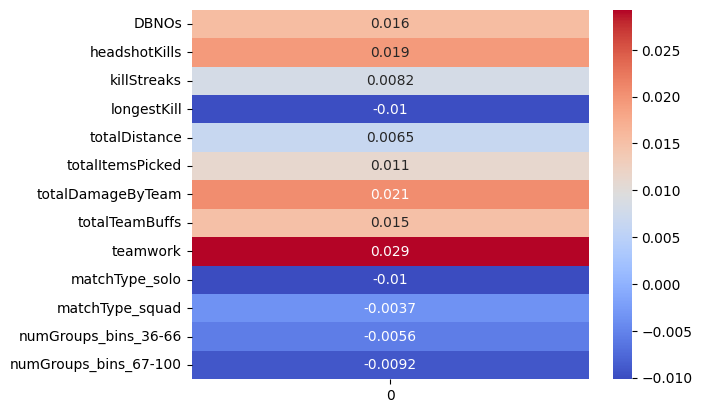

In [175]:
corr_matrix = Test_df.corrwith(train.drop('winPlacePerc',axis=1))

sns.heatmap(corr_matrix.to_frame(), cmap='coolwarm', annot=True)

plt.show()

Fortunatly, The similarity between both train and test datasets is more than good! 

## **Prediction**

In [176]:
predictions = xgb_reg.predict(Test_df)

## **Making a Submission File**

In [177]:
submission_df = pd.DataFrame({'winPlacePerc': predictions})
submission_df.to_csv('submission.csv', index=False)

<img src="https://c4.wallpaperflare.com/wallpaper/793/738/376/pubg-video-games-helmet-reflection-wallpaper-preview.jpg" alt="Paris" style="display: block;margin-left: auto;margin-right: auto;width: 100%;">